# First Steps of Visualization with Open3D

*Bodo Bookhagen [bodo.bookhagen@uni-potsdam.de](mailto:bodo.bookhagen@uni-potsdam.de)*

We use an airborne lidar dataset from the University of Potsdam Campus Golm.
But you could use any dataset in LAZ, PLY, or similar format.

## 0. Initiate python module imports and define some useful functions

In [1]:
import copy, sys, os
import numpy as np

import matplotlib.pyplot as plt

import open3d as o3d
import laspy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 1. Load ALS point via laspy

**The dataset is available via dropbox at:
[https://www.dropbox.com/s/luak66coy8sl22l/ALS2018_UP_Golm_06May2018.laz?dl=0](https://www.dropbox.com/s/luak66coy8sl22l/ALS2018_UP_Golm_06May2018.laz?dl=0)**

In [2]:
pc_path = '.'
pc_fn = 'ALS2018_UP_Golm_06May2018.laz'
pc1 = laspy.read(os.path.join(pc_path, pc_fn))

In [3]:
xyz = np.vstack((pc1.x, pc1.y, pc1.z)).transpose()
xyz

array([[3.62033810e+05, 5.80822980e+06, 3.39000000e+01],
       [3.62033810e+05, 5.80822956e+06, 3.38900000e+01],
       [3.62033880e+05, 5.80822995e+06, 3.38800000e+01],
       ...,
       [3.62608260e+05, 5.80847203e+06, 5.19300000e+01],
       [3.62608480e+05, 5.80847205e+06, 4.40300000e+01],
       [3.62608790e+05, 5.80847201e+06, 4.43700000e+01]])

In [4]:
xyz.shape

(13058731, 3)

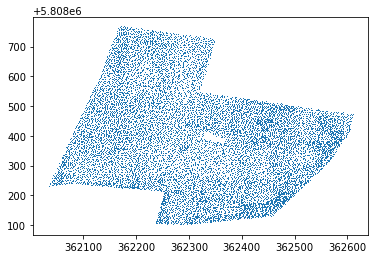

In [5]:
plt.plot(xyz[::1000,0], xyz[::1000,1], ',')

### Access other attributes

In [7]:
pc1.classification

<SubFieldView([2 2 2 ... 5 5 5])>

In [6]:
print(np.unique(pc1.classification))

[1 2 5 6 7]


In [7]:
pc1.xyz[pc1.classification == 2]

array([[3.62033810e+05, 5.80822980e+06, 3.39000000e+01],
       [3.62033810e+05, 5.80822956e+06, 3.38900000e+01],
       [3.62033880e+05, 5.80822995e+06, 3.38800000e+01],
       ...,
       [3.62607220e+05, 5.80847200e+06, 4.30000000e+01],
       [3.62608150e+05, 5.80847212e+06, 4.27600000e+01],
       [3.62608060e+05, 5.80847214e+06, 4.27700000e+01]])

In [8]:
pc1.xyz[pc1.classification == 2].shape

(6711186, 3)

In [11]:
pc1.intensity

array([1006, 1097, 1319, ...,  343,  598, 1400], dtype=uint16)

In [12]:
pc1.point_source_id

array([74, 74, 76, ..., 90, 90, 90], dtype=uint16)

In [13]:
pc1.gps_time

array([38504.46241523, 38504.4624162 , 38723.59231363, ...,
       39375.46490256, 39375.47119874, 39375.47748996])

In [9]:
pts_cl2=pc1.points[pc1.classification == 2]

In [15]:
pts_cl2.array

array([(6203381, 822980, 3390, 1006,  9, 2,  28, 0,  74, 38504.46241523),
       (6203381, 822956, 3389, 1097,  9, 2,  28, 0,  74, 38504.4624162 ),
       (6203388, 822995, 3388, 1319,  9, 2, -12, 0,  76, 38723.59231363),
       ...,
       (6260722, 847200, 4300,  655, 27, 2, -24, 0, 100, 39709.50352815),
       (6260815, 847212, 4276,  805, 18, 2,  11, 0,  87, 39120.31679681),
       (6260806, 847214, 4277, 1156, 27, 2,   7, 0,  90, 39375.4586171 )],
      dtype=[('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('bit_fields', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('point_source_id', '<u2'), ('gps_time', '<f8')])

## 2. Convert numpy array to Open3D point cloud

In [10]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
print('pcd:', pcd)

pcd: PointCloud with 13058731 points.


In [11]:
o3d.visualization.draw_geometries([pcd])

[Open3D INFO]   -- Mouse view control --
[Open3D INFO]     Left button + drag         : Rotate.
[Open3D INFO]     Ctrl + left button + drag  : Translate.
[Open3D INFO]     Wheel button + drag        : Translate.
[Open3D INFO]     Shift + left button + drag : Roll.
[Open3D INFO]     Wheel                      : Zoom in/out.
[Open3D INFO] 
[Open3D INFO]   -- Keyboard view control --
[Open3D INFO]     [/]          : Increase/decrease field of view.
[Open3D INFO]     R            : Reset view point.
[Open3D INFO]     Ctrl/Cmd + C : Copy current view status into the clipboard.
[Open3D INFO]     Ctrl/Cmd + V : Paste view status from clipboard.
[Open3D INFO] 
[Open3D INFO]   -- General control --
[Open3D INFO]     Q, Esc       : Exit window.
[Open3D INFO]     H            : Print help message.
[Open3D INFO]     P, PrtScn    : Take a screen capture.
[Open3D INFO]     D            : Take a depth capture.
[Open3D INFO]     O            : Take a capture of current rendering settings.
[Open3D INFO

In [12]:
pcd.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=12))
pcd.orient_normals_to_align_with_direction([0., 0., 1.])

In [13]:
o3d.visualization.draw_geometries([pcd])

In [14]:
pcd_1m = pcd.voxel_down_sample(voxel_size=1)
print('pcd_1m: ', pcd_1m)

pcd_1m:  PointCloud with 640668 points.


In [15]:
o3d.visualization.draw_geometries([pcd_1m])

### Define some useful functions for visualization

In [16]:
#Generate function to plot two point clouds in different colors
def draw_2pcd(pcd1, pcd2):
    pcd1_temp = copy.deepcopy(pcd1)
    pcd2_temp = copy.deepcopy(pcd2)
    pcd1_temp.paint_uniform_color([1, 0.706, 0]) #orange
    pcd2_temp.paint_uniform_color([0, 0.651, 0.929]) #cyan
    o3d.visualization.draw_geometries([pcd1_temp, pcd2_temp])
    
def get_colors(inp, colormap, vmin=None, vmax=None):
    if vmin == None:
        vmin=np.nanmin(inp)
    if vmax == None:
        vmax=np.nanmax(inp)
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

def get_colors_log(inp, colormap, vmin=None, vmax=None):
    if vmin == None:
        vmin=np.nanmin(np.log10(inp))
    if vmax == None:
        vmax=np.nanmax(np.log10(inp))
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))


In [17]:
draw_2pcd(pcd, pcd_1m)

#### Custom-made color scales

In [19]:
np.asarray(pcd_1m.points)

array([[3.62610760e+05, 5.80847148e+06, 5.07100000e+01],
       [3.62609020e+05, 5.80847118e+06, 4.96200000e+01],
       [3.62609460e+05, 5.80847183e+06, 4.50766667e+01],
       ...,
       [3.62347713e+05, 5.80871826e+06, 3.47157692e+01],
       [3.62197760e+05, 5.80852126e+06, 4.67922807e+01],
       [3.62350684e+05, 5.80852035e+06, 3.55075000e+01]])

In [21]:
rgb = get_colors(np.asarray(pcd_1m.points)[:,2], plt.cm.terrain, 
                 vmin=np.percentile(np.asarray(pcd_1m.points)[:,2],2), 
                 vmax=np.percentile(np.asarray(pcd_1m.points)[:,2],98))
pcd_1m.colors = o3d.utility.Vector3dVector(rgb[:,0:3])
o3d.visualization.draw_geometries([pcd_1m])

### Calculate point density using a kdtree and visualize

In [22]:
from scipy.spatial import cKDTree
A = np.asarray(pcd_1m.points)

k=24
dist, indices = cKDTree(A).query(A, k=k, workers=-1)

In [23]:
dist

array([[0.        , 0.6543938 , 1.16749256, ..., 2.44500014, 2.44530737,
        2.46469192],
       [0.        , 0.64736431, 0.68331301, ..., 1.90581816, 1.92137546,
        1.95274966],
       [0.        , 0.30796825, 0.59897863, ..., 2.29997191, 2.40736082,
        2.50140183],
       ...,
       [0.        , 0.99967565, 1.00963284, ..., 2.81595755, 2.9547347 ,
        2.97207579],
       [0.        , 0.97321743, 1.00849812, ..., 2.5495675 , 2.5968398 ,
        2.70566055],
       [0.        , 0.339538  , 0.7524789 , ..., 2.19861351, 2.24371408,
        2.25036952]])

In [24]:
max_distances = np.max(dist, axis=1)
circle_volume = max_distances**3 * (4./3.) * np.pi
pt_density = k / circle_volume #nr of points / area

In [25]:
rgb = get_colors(pt_density, plt.cm.viridis, 
                 vmin=np.percentile(pt_density,2), 
                 vmax=np.percentile(pt_density,98))
pcd_1m.colors = o3d.utility.Vector3dVector(rgb[:,0:3])
o3d.visualization.draw_geometries([pcd_1m])